# 5 . Write a program to implement the naive Bayesian classifier for a sample   
#     Training dataset stored as .csv file.Compute the accuracy of the classifier    ,considering few datasets

# Steps
##  1.Load CSV file

##  2.Split the dataset into Training and Test data based on split ratio

##  3. Train the training dataset

##      3a. separate the dataset into ‘Yes’ class and ‘No’ class  ie [ 1 or 0 ]class
##      3b,.3c ,3d   Find the mean and standard deviation for class  class 0 and Class 1

##  4.Do  predictions for each Test case
##      4a,4b,4c  .For each Test case find the Gaussian probability for both 0 and 1 class using    
##            trained set   mean and SD  .Based on that  predict to which   class it  belongs to.

##  5. Compare the predicted class and the  actual Test class to find the accuracy 


In [186]:
import csv
import random
import math

# Outlook	Humidity	wind	play
1       1	             1	         1	         0
2	    1	             1           2	         0
3       2	             1	         1           1
4	    3	             1	         1	         1
5	    3	             2	         1	         1
6	    3	             2	         2	         0
7	    2	             2	         2	         1
8       1	             1	         1	         0
9	    1	             2	         1	         1
10	    3	             2	         1	         1
11	    1	             2	         2	         1
12	    2	             1	         2	         1
13	    2	             2	         1	         1
14	    3	             1	         2	         0


In [187]:
#1
def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset


In [188]:
#2
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]



# Training set  [ trainSet ]
    Outlook	        Humidity	  wind	       play
1       1	             1	         1	         0
2	    1	             1           2	         0
4	    3	             1	         1	         1
5	    3	             2	         1	         1
7	    2	             2	         2	         1
8       1	             1	         1	         0
12	    2	             1	         2	         1
13	    2	             2	         1	         1
14	    3	             1	         2	         0

# Test set   [copy]
# Outlook	Humidity	wind	play

3       2	             1	         1           1
6	    3	             2	         2	         0
9	    1	             2	         1	         1
10	    3	             2	         1	         1
11	    1	             2	         2	         1

 
# Split 14 Rows into train = 9  and test= 5  rows

In [189]:
# 3 a 
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
      # print(dataset[0])
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
        
    return separated

# Open a dictionary with a key,value pair
    separated[0] { [0.0 : [1,1,2,0],[3,1,2,0],[1,1,1,0],[1,1,1,0] ]
    separated[1]   [1.0 : [2,2,1,1],[2,2,2,1],[3,1,1,1],[3,2,1,1],[2,1,2,1] ] }

#  Mean
     ( Σ xi ) / n

In [190]:
# 3 c
def mean(numbers):
    return sum(numbers)/float(len(numbers))

# Stddev
subtract the mean individually from each of the numbers given and square the result.

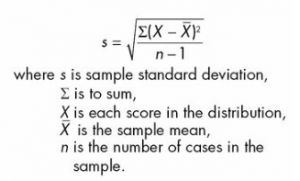# 

In [191]:
# 3 d
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [192]:
# 3 b
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

# Mean and standard deviation of  class 0 and class1
   
             M(O),S(O))    M(H),S(H)    M(W),S(W)     M(P),S(P)
    {0.0    :[1.5,1.0]    [1  , 0 ]     [1.5,0.5]
   
     1.0    :[2.4,0.5]    [1.6,0.5]     [1.4,0.5]     

In [193]:
#3
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    #print(separated)
    #print(len(separated))
    summaries = {}
    for classValue, instances in separated.items():
            summaries[classValue] = summarize(instances)     
    #print(summaries)
    return summaries


# gaussian  distribution

# 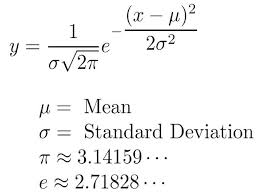

In [194]:
# 4 c 
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent


In [195]:
#4 b
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
           # print(len(classSummaries))
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            #print(x)
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities


# Predict for each test input
    
     Ex :          O  H  W  P
       Test i/p   [2  1  1  1]
         
         0 class   x    M    S
                   2   1.5  1.0
                   1    1   0.0          ->  0
                   1   1.5  0.5
                   
         1 class   2   2.4  0.5
                   1   1.6  0.5          -> 1.5
                   1   1.4  0.5
   
   

In [196]:
#4 a
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    #print(probabilities)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

#  predict
     Best Label       :  1.5
     Best class value :  1 

In [197]:
#4
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
      # print(predictions) 
    return predictions


#                                      predictions
    Outlook	         Humidity	   wind	       play

3       2	             1	         1           1
6	    3	             2	         2	         1
9	    1	             2	         1	         0
10	    3	             2	         1	         1
11	    1	             2	         2	         1


In [198]:
#5
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

# Test set    
     Outlook	       Humidity	   wind	       play    Outlook	   Humidity	   wind	       play

3       2	             1	         1           1         2	    1	           1             1
6	    3	             2	         2	         0          3	    2	           2	         1
9	    1	             2	         1	         1          1	    2	           1	         0
10	    3	             2	         1	         1         3	     2	           1	         1
11	    1	             2	         2	         1         1	    2	           2	         1 

 
  correct = 3/5 * 100  =  60 %



In [199]:
filename = 'sports.csv'
splitRatio = 0.70
# 1
dataset = loadCsv(filename)
#2
trainingSet, testSet = splitDataset(dataset, splitRatio)
#print(trainingSet)
#print(testSet)
#print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingSet), len(testSet)))


In [200]:
#3
summaries = summarizeByClass(trainingSet) 
#print(summaries)

In [201]:
#4
# test model
predictions = getPredictions(summaries, testSet)
#print(predictions)

In [202]:
#5
accuracy = getAccuracy(testSet, predictions)
#print('Accuracy: {0}%'.format(accuracy))